# Deep Learning
Minicourse, University of Liverpool <br>
April 2022 <br>
Lecturer: Mikko Pakkanen

## Example: Regression
<i>22 April 2022</i>

Let us import the necessary libraries, and set plotting style.

In [1]:
import numpy as np
import numpy.random as npr
import tensorflow.keras as keras
import matplotlib.pyplot as plt
plt.style.use('ggplot')

We first define the function $g(x) := \cos(10x)$, $x \in \mathbb{R}$. This is the function we try to learn from noisy data.

In [2]:
a = 10
def g(x):
    return np.cos(a*x)

We add noise to make non-linear

We then generate the data $x^0,x^1,\ldots,x^{N-1}$ (we switch here to the convention of Python of starting indexation from $0$) from $\mathrm{Uniform}(0,1)$ and
\begin{equation*}
y^i = g(x^i) + \varepsilon^i, \quad i=0,1\ldots,N-1,
\end{equation*}
with iid $\varepsilon^i \sim N(0,0.1)$, $i = 0,1,\ldots,N-1$, for $N = 1\,000\,000$.

In [3]:
npr.seed(12345)
N = 1000000
var = 0.1
x = npr.uniform(0,1, (N,1))
eps = npr.normal(0, np.sqrt(var), (N,1))
y = g(x)+eps
#We plot it to see what it looks like

Let us plot the first $1000$ samples:

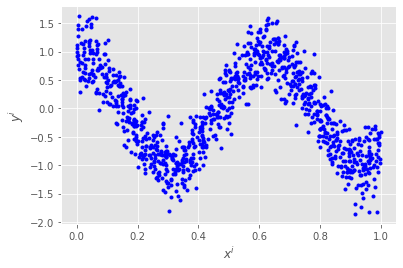

In [4]:
N_sub = 1000
plt.plot(x[0:N_sub,], y[0:N_sub,], "bo", markersize=3)
plt.xlabel(r"$x^i$")
plt.ylabel(r"$y^i$")
plt.show() #Observation noise

Functions is R to R so input and out is 1

Now we specify the neural network
\begin{equation*}
\widehat{g} \in \mathcal{N}_4(1,100,100,100,1; \mathrm{ReLU},\mathrm{ReLU},\mathrm{ReLU},\mathrm{Id})
\end{equation*}
using the <code>Sequential</code> model of <b>Keras</b>, and inspect the specification.

In [5]:
g_hat = keras.Sequential([
    keras.layers.InputLayer(input_shape=(1,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="linear")
]    
)
g_hat.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


We compile $\widehat{g}$ so that it will be trained using Adam to minimise squared loss.

In [6]:
g_hat.compile(optimizer="adam", loss="mean_squared_error") #using mean_squared_error as doing regression.

Then we are ready to train $\widehat{g}$, with minibatches of size $100$, over $5$ epochs.

In [7]:
train = g_hat.fit(x, y, batch_size=100, epochs=5)

Epoch 1/5
10000/10000 [==============================] - 18s 2ms/step - loss: 0.1120
Epoch 2/5
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1024
Epoch 3/5
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1021
Epoch 4/5
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1019
Epoch 5/5
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1017


We stored the training history into an object called <code>train</code>, from which we can extract and plot training loss for each epoch.

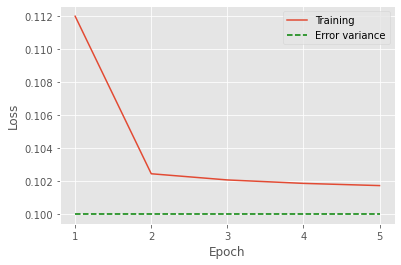

In [8]:
plt.plot(np.arange(1, 6), train.history["loss"], label="Training")
plt.plot([1,5], [var,var], "g--", label="Error variance")
plt.xticks(np.arange(1, 6))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
#error var - is best possible loss, is the noise we put in

Let us compare $g$ with the trained $\widehat{g}$.

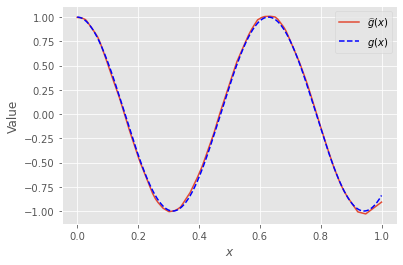

In [9]:
x_grid = np.linspace(0, 1, num=1001)
y_hat = g_hat.predict(x_grid)
g_grid = g(x_grid)
plt.plot(x_grid, y_hat, label=r"$\widehat{g}(x)$")
plt.plot(x_grid, g_grid, "b--", label="$g(x)$")
plt.xlabel("$x$")
plt.ylabel("Value")
plt.legend()
plt.show()
#We using synethic data and many data points

The function $g$ is not so hard to learn when we have $N=1\,000\,000$ samples!

To demonstrate the potential problem of <b>overfitting</b> and a regularisation technique called <b>dropout</b>, which mitigates it, we make now the problem harder: we are going to use only the first $200$ samples. In fact, we are going to even split these $200$ samples into a <b>training</b> set of $100$ samples and <b>validation set</b> of $100$ samples.

overfitting better seen with low samples or different input size, validation is set aside to compare.

at each epoch we validate performance. 

In [10]:
N_small = 200
x_sub = x[0:N_small]
y_sub = y[0:N_small]
#lots of parameters

We now specify a blatantly overparameterised network
\begin{equation*}
\widehat{g}_{\mathrm{over}} \in \mathcal{N}_4(1,1000,1000,1000,1;\mathrm{ReLU},\mathrm{ReLU},\mathrm{ReLU},\mathrm{Id}).
\end{equation*}

In [11]:
g_hat_over = keras.Sequential([
    keras.layers.InputLayer(input_shape=(1,)),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1, activation="linear")
]    
)
g_hat_over.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              2000      
                                                                 
 dense_5 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_6 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_7 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 2,005,001
Trainable params: 2,005,001
Non-trainable params: 0
_________________________________________________________________


We train it with Adam using full batches over $500$ epochs.

One strat to avoid overfit is to run low number of epochs.

loss and val-loss should be close. unlike here

In [12]:
g_hat_over.compile(optimizer="adam", loss="mean_squared_error")
train = g_hat_over.fit(x_sub, y_sub, batch_size=100, epochs=500, validation_split=0.5)
#scikit-learn also does spliting.
# mini-batch is full data set

Epoch 1/500
1/1 [==============================] - 1s 662ms/step - loss: 0.6318 - val_loss: 0.5582
Epoch 2/500
1/1 [==============================] - 0s 67ms/step - loss: 0.6268 - val_loss: 0.5466
Epoch 3/500
1/1 [==============================] - 0s 68ms/step - loss: 0.6134 - val_loss: 0.5489
Epoch 4/500
1/1 [==============================] - 0s 66ms/step - loss: 0.6154 - val_loss: 0.5470
Epoch 5/500
1/1 [==============================] - 0s 72ms/step - loss: 0.6141 - val_loss: 0.5423
Epoch 6/500
1/1 [==============================] - 0s 72ms/step - loss: 0.6102 - val_loss: 0.5402
Epoch 7/500
1/1 [==============================] - 0s 72ms/step - loss: 0.6095 - val_loss: 0.5388
Epoch 8/500
1/1 [==============================] - 0s 72ms/step - loss: 0.6092 - val_loss: 0.5365
Epoch 9/500
1/1 [==============================] - 0s 64ms/step - loss: 0.6072 - val_loss: 0.5345
Epoch 10/500
1/1 [==============================] - 0s 65ms/step - loss: 0.6053 - val_loss: 0.5328
Epoch 11/500
1/1 [

Epoch 84/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0915 - val_loss: 0.1364
Epoch 85/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0913 - val_loss: 0.1361
Epoch 86/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0909 - val_loss: 0.1361
Epoch 87/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0911 - val_loss: 0.1352
Epoch 88/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0905 - val_loss: 0.1351
Epoch 89/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0907 - val_loss: 0.1349
Epoch 90/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0903 - val_loss: 0.1361
Epoch 91/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0904 - val_loss: 0.1359
Epoch 92/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0901 - val_loss: 0.1345
Epoch 93/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0901 - val_loss: 0.1337
Epoch 94/5

1/1 [==============================] - 0s 48ms/step - loss: 0.0803 - val_loss: 0.1227
Epoch 167/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0801 - val_loss: 0.1239
Epoch 168/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0800 - val_loss: 0.1226
Epoch 169/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0797 - val_loss: 0.1217
Epoch 170/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0796 - val_loss: 0.1214
Epoch 171/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0794 - val_loss: 0.1217
Epoch 172/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0790 - val_loss: 0.1224
Epoch 173/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0790 - val_loss: 0.1213
Epoch 174/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0786 - val_loss: 0.1206
Epoch 175/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0785 - val_loss: 0.1213
Epoch 176/500


1/1 [==============================] - 0s 48ms/step - loss: 0.0720 - val_loss: 0.1154
Epoch 249/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0724 - val_loss: 0.1114
Epoch 250/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0724 - val_loss: 0.1152
Epoch 251/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0723 - val_loss: 0.1108
Epoch 252/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0718 - val_loss: 0.1133
Epoch 253/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0715 - val_loss: 0.1117
Epoch 254/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0711 - val_loss: 0.1124
Epoch 255/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0709 - val_loss: 0.1118
Epoch 256/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0708 - val_loss: 0.1111
Epoch 257/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0709 - val_loss: 0.1127
Epoch 258/500


1/1 [==============================] - 0s 40ms/step - loss: 0.0710 - val_loss: 0.1100
Epoch 331/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0701 - val_loss: 0.1114
Epoch 332/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0694 - val_loss: 0.1116
Epoch 333/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0693 - val_loss: 0.1104
Epoch 334/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0695 - val_loss: 0.1133
Epoch 335/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0702 - val_loss: 0.1107
Epoch 336/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0712 - val_loss: 0.1177
Epoch 337/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0724 - val_loss: 0.1110
Epoch 338/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0729 - val_loss: 0.1171
Epoch 339/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0729 - val_loss: 0.1099
Epoch 340/500


1/1 [==============================] - 0s 40ms/step - loss: 0.0687 - val_loss: 0.1140
Epoch 413/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0695 - val_loss: 0.1099
Epoch 414/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0705 - val_loss: 0.1173
Epoch 415/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0711 - val_loss: 0.1116
Epoch 416/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0711 - val_loss: 0.1152
Epoch 417/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0702 - val_loss: 0.1096
Epoch 418/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0690 - val_loss: 0.1116
Epoch 419/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0682 - val_loss: 0.1109
Epoch 420/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0682 - val_loss: 0.1093
Epoch 421/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0686 - val_loss: 0.1144
Epoch 422/500


1/1 [==============================] - 0s 40ms/step - loss: 0.0670 - val_loss: 0.1118
Epoch 495/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0674 - val_loss: 0.1097
Epoch 496/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0683 - val_loss: 0.1166
Epoch 497/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0691 - val_loss: 0.1117
Epoch 498/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0692 - val_loss: 0.1147
Epoch 499/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0685 - val_loss: 0.1103
Epoch 500/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0676 - val_loss: 0.1110


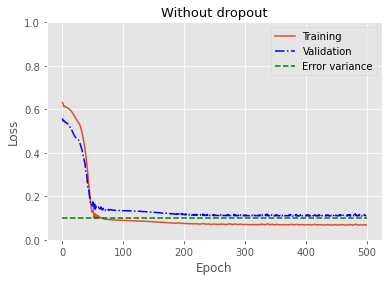

In [13]:
plt.plot(train.history["loss"], label="Training")
plt.plot(train.history["val_loss"], "b-.", label="Validation")
plt.plot([0,500], [var,var], "g--", label="Error variance")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Without dropout", loc='center', fontsize=13)
plt.ylim(0,1)
plt.legend()
plt.show()

training below error, so fitting to noise.

We note that <b>training loss</b> becomes lower than <b>validation loss</b>, in fact lower than the model error variance 0.1. This is a clear sign of overfitting. Visual assessment confirms that this is indeed true.

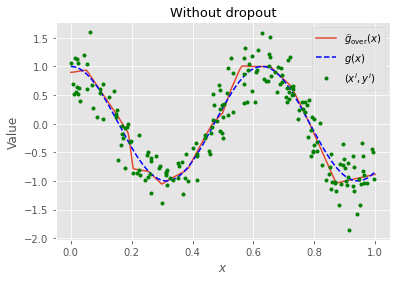

In [14]:
y_hat = g_hat_over.predict(x_grid)
plt.plot(x_grid, y_hat, label=r"$\widehat{g}_{\mathrm{over}}(x)$")
plt.plot(x_grid, g_grid, "b--", label="$g(x)$")
plt.plot(x_sub, y_sub, "go", markersize=3, label="$(x^i,y^i)$")
plt.xlabel("$x$")
plt.ylabel("Value")
plt.title("Without dropout", loc='center', fontsize=13)
plt.legend()
plt.show()

Ways to mitigate overfitting, monitor training and validation loss and stop epochs when no longer similar i.e. 0.2

Dropout method manipulate weights. Need to rescale to keep magnitude the same.

Regularisation: L2penality, L1Penatily, another time to apply in training.

Now we apply <b>dropout</b>. In a dropout layer, inputs are randomly replaced by zeros with fixed probability $p \in (0,1)$ at each step of the training. Non-zero inputs are scaled by $\frac{1}{1-p}$ to retain the original magnitude of the sum of inputs. We introduce a dropout layer with dropout probability $p=0.4$ after each hidden layer:

In [15]:
g_hat_dropout = keras.Sequential([
    keras.layers.InputLayer(input_shape=(1,)),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation="linear")
]    
)
g_hat_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              2000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_10 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_11 (Dense)            (None, 1)                

We compile and train the new network $\widehat{g}_{\mathrm{dropout}}$ with other settings unchanged.

In [16]:
g_hat_dropout.compile(optimizer="adam", loss="mean_squared_error")
train = g_hat_dropout.fit(x_sub, y_sub, batch_size=100, epochs=500, validation_split=0.5)

Epoch 1/500
1/1 [==============================] - 1s 652ms/step - loss: 0.6392 - val_loss: 0.5484
Epoch 2/500
1/1 [==============================] - 0s 72ms/step - loss: 0.6167 - val_loss: 0.5506
Epoch 3/500
1/1 [==============================] - 0s 64ms/step - loss: 0.6205 - val_loss: 0.5453
Epoch 4/500
1/1 [==============================] - 0s 64ms/step - loss: 0.6120 - val_loss: 0.5445
Epoch 5/500
1/1 [==============================] - 0s 64ms/step - loss: 0.6059 - val_loss: 0.5455
Epoch 6/500
1/1 [==============================] - 0s 66ms/step - loss: 0.6137 - val_loss: 0.5441
Epoch 7/500
1/1 [==============================] - 0s 70ms/step - loss: 0.6223 - val_loss: 0.5397
Epoch 8/500
1/1 [==============================] - 0s 72ms/step - loss: 0.6044 - val_loss: 0.5373
Epoch 9/500
1/1 [==============================] - 0s 72ms/step - loss: 0.6017 - val_loss: 0.5367
Epoch 10/500
1/1 [==============================] - 0s 64ms/step - loss: 0.6231 - val_loss: 0.5349
Epoch 11/500
1/1 [

Epoch 84/500
1/1 [==============================] - 0s 48ms/step - loss: 0.2335 - val_loss: 0.1736
Epoch 85/500
1/1 [==============================] - 0s 48ms/step - loss: 0.2404 - val_loss: 0.1429
Epoch 86/500
1/1 [==============================] - 0s 40ms/step - loss: 0.2501 - val_loss: 0.1403
Epoch 87/500
1/1 [==============================] - 0s 56ms/step - loss: 0.2261 - val_loss: 0.1708
Epoch 88/500
1/1 [==============================] - 0s 48ms/step - loss: 0.2270 - val_loss: 0.1422
Epoch 89/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1896 - val_loss: 0.1647
Epoch 90/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1568 - val_loss: 0.1608
Epoch 91/500
1/1 [==============================] - 0s 48ms/step - loss: 0.2221 - val_loss: 0.1824
Epoch 92/500
1/1 [==============================] - 0s 48ms/step - loss: 0.2784 - val_loss: 0.1364
Epoch 93/500
1/1 [==============================] - 0s 56ms/step - loss: 0.2138 - val_loss: 0.2367
Epoch 94/5

1/1 [==============================] - 0s 56ms/step - loss: 0.1114 - val_loss: 0.1127
Epoch 167/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1396 - val_loss: 0.1090
Epoch 168/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1111 - val_loss: 0.1083
Epoch 169/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1207 - val_loss: 0.1066
Epoch 170/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1062 - val_loss: 0.1061
Epoch 171/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0997 - val_loss: 0.1101
Epoch 172/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1195 - val_loss: 0.1122
Epoch 173/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1053 - val_loss: 0.1113
Epoch 174/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0984 - val_loss: 0.1108
Epoch 175/500
1/1 [==============================] - 0s 56ms/step - loss: 0.1181 - val_loss: 0.1096
Epoch 176/500


1/1 [==============================] - 0s 48ms/step - loss: 0.1149 - val_loss: 0.1082
Epoch 249/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0948 - val_loss: 0.1070
Epoch 250/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1143 - val_loss: 0.1077
Epoch 251/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1089 - val_loss: 0.1049
Epoch 252/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1161 - val_loss: 0.1049
Epoch 253/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0910 - val_loss: 0.1085
Epoch 254/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1013 - val_loss: 0.1106
Epoch 255/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1269 - val_loss: 0.1083
Epoch 256/500
1/1 [==============================] - 0s 32ms/step - loss: 0.1033 - val_loss: 0.1069
Epoch 257/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1097 - val_loss: 0.1060
Epoch 258/500


1/1 [==============================] - 0s 40ms/step - loss: 0.0978 - val_loss: 0.1016
Epoch 331/500
1/1 [==============================] - 0s 41ms/step - loss: 0.1068 - val_loss: 0.0992
Epoch 332/500
1/1 [==============================] - 0s 48ms/step - loss: 0.1006 - val_loss: 0.1007
Epoch 333/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1143 - val_loss: 0.1059
Epoch 334/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1042 - val_loss: 0.1091
Epoch 335/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1104 - val_loss: 0.1029
Epoch 336/500
1/1 [==============================] - 0s 32ms/step - loss: 0.1120 - val_loss: 0.1058
Epoch 337/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1034 - val_loss: 0.1123
Epoch 338/500
1/1 [==============================] - 0s 56ms/step - loss: 0.1209 - val_loss: 0.1136
Epoch 339/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0915 - val_loss: 0.1095
Epoch 340/500


1/1 [==============================] - 0s 40ms/step - loss: 0.0931 - val_loss: 0.1098
Epoch 413/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0906 - val_loss: 0.1101
Epoch 414/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0987 - val_loss: 0.1091
Epoch 415/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1144 - val_loss: 0.1071
Epoch 416/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0884 - val_loss: 0.1041
Epoch 417/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1035 - val_loss: 0.1078
Epoch 418/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1032 - val_loss: 0.1122
Epoch 419/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1127 - val_loss: 0.1045
Epoch 420/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1067 - val_loss: 0.1015
Epoch 421/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1183 - val_loss: 0.1024
Epoch 422/500


1/1 [==============================] - 0s 32ms/step - loss: 0.0966 - val_loss: 0.1028
Epoch 495/500
1/1 [==============================] - 0s 32ms/step - loss: 0.1033 - val_loss: 0.1052
Epoch 496/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0979 - val_loss: 0.1096
Epoch 497/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1050 - val_loss: 0.1115
Epoch 498/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1103 - val_loss: 0.1070
Epoch 499/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0938 - val_loss: 0.1055
Epoch 500/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1078 - val_loss: 0.1037


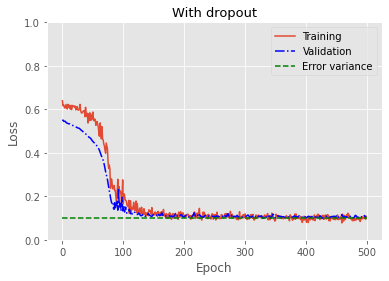

In [17]:
plt.plot(train.history["loss"], label="Training")
plt.plot(train.history["val_loss"], "b-.", label="Validation")
plt.plot([0,500], [var,var], "g--", label="Error variance")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("With dropout", loc='center', fontsize=13)
plt.ylim(0,1)
plt.show()

We do not see a major discrepancy between training and validation losses. Also training loss tends to stay above the model error variance $0.1$. Let us visually study the fit.

Training curve is noiser, as dropout.

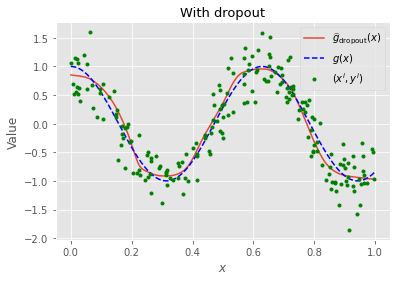

In [18]:
y_hat = g_hat_dropout.predict(x_grid)
plt.plot(x_grid, y_hat, label=r"$\widehat{g}_{\mathrm{dropout}}(x)$")
plt.plot(x_grid, g_grid, "b--", label="$g(x)$")
plt.plot(x_sub, y_sub, "go", markersize=3, label="$(x^i,y^i)$")
plt.xlabel("$x$")
plt.ylabel("Value")
plt.title("With dropout", loc='center', fontsize=13)
plt.legend()
plt.show()

While the fit is not perfect (due to the small amount of samples), the overfit problem has been mitigated.